In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [416]:
!pip install lmfit

In [417]:
!pip install seaborn
#pip install missingno

In [374]:
!pip install missingno

In [2]:
df = pd.read_csv("C:/Users/jay patel/Desktop/Covid_prediction_model/data/Cleaned-Data.csv")

In [3]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [4]:

pd.pandas.set_option('display.max_columns',None)

In [5]:
display("Shape of dataset")
print("Rows:",df.shape[0],"\nColumns:",df.shape[1])

'Shape of dataset'

Rows: 316800 
Columns: 27


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [7]:
for i in df.columns:
    print("\nColumn Name:",i,"-->",df[i].unique(),"-->Unique Count",len(df[i].unique()))


Column Name: Fever --> [1 0] -->Unique Count 2

Column Name: Tiredness --> [1 0] -->Unique Count 2

Column Name: Dry-Cough --> [1 0] -->Unique Count 2

Column Name: Difficulty-in-Breathing --> [1 0] -->Unique Count 2

Column Name: Sore-Throat --> [1 0] -->Unique Count 2

Column Name: None_Sympton --> [0 1] -->Unique Count 2

Column Name: Pains --> [1 0] -->Unique Count 2

Column Name: Nasal-Congestion --> [1 0] -->Unique Count 2

Column Name: Runny-Nose --> [1 0] -->Unique Count 2

Column Name: Diarrhea --> [1 0] -->Unique Count 2

Column Name: None_Experiencing --> [0 1] -->Unique Count 2

Column Name: Age_0-9 --> [1 0] -->Unique Count 2

Column Name: Age_10-19 --> [0 1] -->Unique Count 2

Column Name: Age_20-24 --> [0 1] -->Unique Count 2

Column Name: Age_25-59 --> [0 1] -->Unique Count 2

Column Name: Age_60+ --> [0 1] -->Unique Count 2

Column Name: Gender_Female --> [0 1] -->Unique Count 2

Column Name: Gender_Male --> [1 0] -->Unique Count 2

Column Name: Gender_Transgender -->

In [8]:
severity_columns = df.filter(like='Severity_None').columns

In [9]:
df['Severity_None'].replace({1:'None',0:'No'},inplace =True)

In [10]:
df['Condition']=df[severity_columns].values.tolist()

In [11]:
def removing(list1):
    list1 = set(list1) 
    list1.discard("No")
    a = ''.join(list1)
    return a

In [12]:
df['Condition'] = df['Condition'].apply(removing)


In [13]:
age_columns = df.filter(like='Age_').columns
gender_columns = df.filter(like='Gender_').columns
contact_columns = df.filter(like='Contact_').columns

In [14]:
No_risk_age = df.groupby(['Severity_None'])[age_columns].sum()
No_risk_gender = df.groupby(['Severity_None'])[gender_columns].sum()
No_risk_contact = df.groupby(['Severity_None'])[contact_columns].sum()

In [15]:
Low_risk_age = df.groupby(['Severity_Mild'])[age_columns].sum()
Low_risk_gender = df.groupby(['Severity_Mild'])[gender_columns].sum()
Low_risk_contact = df.groupby(['Severity_Mild'])[contact_columns].sum()

In [16]:
Moderate_risk_age = df.groupby(['Severity_Moderate'])[age_columns].sum()
Moderate_risk_gender = df.groupby(['Severity_Moderate'])[gender_columns].sum()
Moderate_risk_contact = df.groupby(['Severity_Moderate'])[contact_columns].sum()

In [17]:
Severe_risk_age = df.groupby(['Severity_Severe'])[age_columns].sum()
Severe_risk_gender = df.groupby(['Severity_Severe'])[gender_columns].sum()
Severe_risk_contact = df.groupby(['Severity_Severe'])[contact_columns].sum()

<AxesSubplot:xlabel='Condition', ylabel='count'>

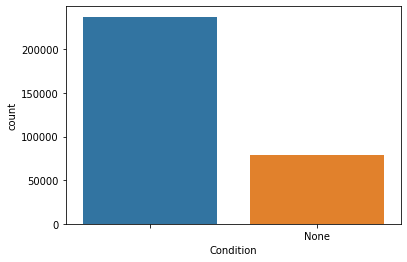

In [18]:
sns.countplot(df['Condition'])

In [19]:
df['Symptoms_Score'] = df.iloc[:,:5].sum(axis=1) + df.iloc[:,6:10].sum(axis=1)

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])

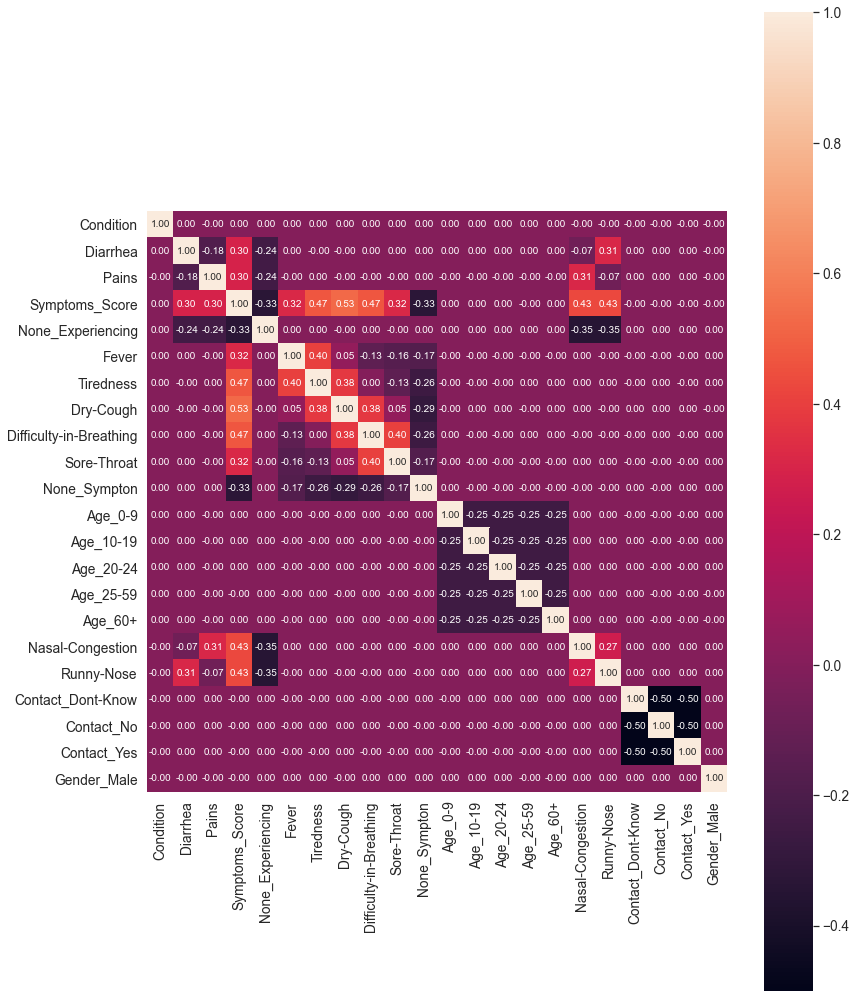

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 18
corrmat = df.corr()
k = 22
cols = corrmat.nlargest(k, 'Condition')['Condition'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [22]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Condition,Symptoms_Score
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,No,0,0,0,1,China,0,9
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,No,0,0,1,0,China,0,9
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,No,0,1,0,0,China,0,9
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,No,0,0,0,1,China,0,9
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,No,0,0,1,0,China,0,9


In [48]:
X= df.drop(['Condition','None_Sympton','Nasal-Congestion','Runny-Nose','None_Experiencing','Age_0-9','Age_10-19','Age_20-24','Age_25-59','Gender_Female','Gender_Male','Gender_Transgender','Contact_Dont-Know','Contact_No','Sore-Throat','Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe','Country','Contact_Yes','Symptoms_Score'],axis=1)
y= df['Condition']

In [47]:
X=np.array(X).reshape((-1,1))

In [45]:
y=np.array(y).reshape((-1,1))

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
import pandas as pd
train=pd.concat([X_train, y_train])
train.to_csv("C:/Users/jay patel/Desktop/Covid_prediction_model/data/train.csv",index=False)

In [28]:
train

,0,Age_60+,Diarrhea,Difficulty-in-Breathing,Dry-Cough,Fever,Pains,Tiredness
125151,NaN,1.0,0.0,0.0,0.0,1.0,1.0,0.0
36050,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0
222457,NaN,0.0,0.0,1.0,1.0,0.0,1.0,1.0
250914,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0
296710,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
119879,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259178,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131932,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146867,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
dev

,0,Age_60+,Diarrhea,Difficulty-in-Breathing,Dry-Cough,Fever,Pains,Tiredness
277936,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0
193502,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0
92446,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0
117607,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0
240924,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
122340,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151370,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288434,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1619,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
dev=pd.concat([X_test, y_test])
dev.to_csv("C:/Users/jay patel/Desktop/Covid_prediction_model/data/test.csv",index=False)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253440 entries, 125151 to 121958
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Fever                    253440 non-null  int64
 1   Tiredness                253440 non-null  int64
 2   Dry-Cough                253440 non-null  int64
 3   Difficulty-in-Breathing  253440 non-null  int64
 4   Pains                    253440 non-null  int64
 5   Diarrhea                 253440 non-null  int64
 6   Age_60+                  253440 non-null  int64
dtypes: int64(7)
memory usage: 15.5 MB


In [34]:
# use the model to make predictions with the test data
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7513099747474747

In [36]:
import pickle

In [37]:
pickle.dump(model, open('model.pkl','wb'))

In [61]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[1, 1, 1, 0, 0, 0, 0]]))

[0]
